In [2]:

from sklearn.metrics import make_scorer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

In [15]:

indexes = [8041, 7774, 2677]

#файл с сырыми данными
f_1 = "/content/drive/MyDrive/Colab_Notebooks/Diplom Work/data/SQLiV3.csv"

#считываем файл с данными
df = pd.read_csv(f_1,  sep=',', on_bad_lines='skip', encoding='utf-8' )
df.head(15)
#Замечаем, что в данных есть ошибки, поэтому их надо устранять

#Удаляем последние 2 столбца
df.drop(['Unnamed: 2', 'Unnamed: 3'], axis=1, inplace=True)
df.head(15)

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1


In [16]:
print("----------------------------------------------------")
df.info()
print("----------------------------------------------------")
#Замечаем, что количество объектов разное
df['Label'].describe()
#у нас должно быть не 42 уникальных значения в поле label, а 2


----------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30904 non-null  object
 1   Label     30664 non-null  object
dtypes: object(2)
memory usage: 483.2+ KB
----------------------------------------------------


count     30664
unique       42
top           0
freq      19268
Name: Label, dtype: object

In [17]:
#Считаем количество значений NaN в столбце Label
num_nan = df['Label'].isna().sum()
#удаляем их
df = df.dropna()
print("Количество значений NaN в столбце Label: " + str(num_nan) + '\nУникальные значения для поля Label: ')

#Выделяем уникальные значения в столбце Label, нужно исправить данные ошибки
unique_labels = pd.unique(df['Label'])
print('\n'.join(l for l in unique_labels))

Количество значений NaN в столбце Label: 255
Уникальные значения для поля Label: 
1
SELECT *
 --
 desc users
 OR
waitfor delay '0:0:__TIME__'--
 drop table temp --
0
 grant resource to name
 EXEC SelectAllCustomers
 /*Select all the columns of all the records in the Customers table:*/
*/
 CREATE VIEW [Products Above Average Price] AS
 CREATE OR REPLACE VIEW view_name AS
 DROP TABLE Suppliers
 CREATE PROCEDURE SelectAllCustomers AS
  EXEC SelectAllCustomers
 DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'
 CREATE OR REPLACE VIEW [Brazil Customers] AS
  SELECT * FROM CustomersLIMIT 3
SELECT * FROM Customers
 SELECT TOP 50 PERCENT * FROM Customers
 SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY
SELECT TOP 3 * FROM Customers
 SELECT * FROM Customers
SELECT SUM ( Quantity ) 
 SELECT column_name ( s ) 
 SELECT City FROM Customers


In [18]:
#Отбрасываем набор, где Label не равен 0 или 1
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index)
#Преобразуем тип столбца Label, так как там теперь находятся только значения 0 или 1
df['Label'] = df['Label'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 717.4+ KB


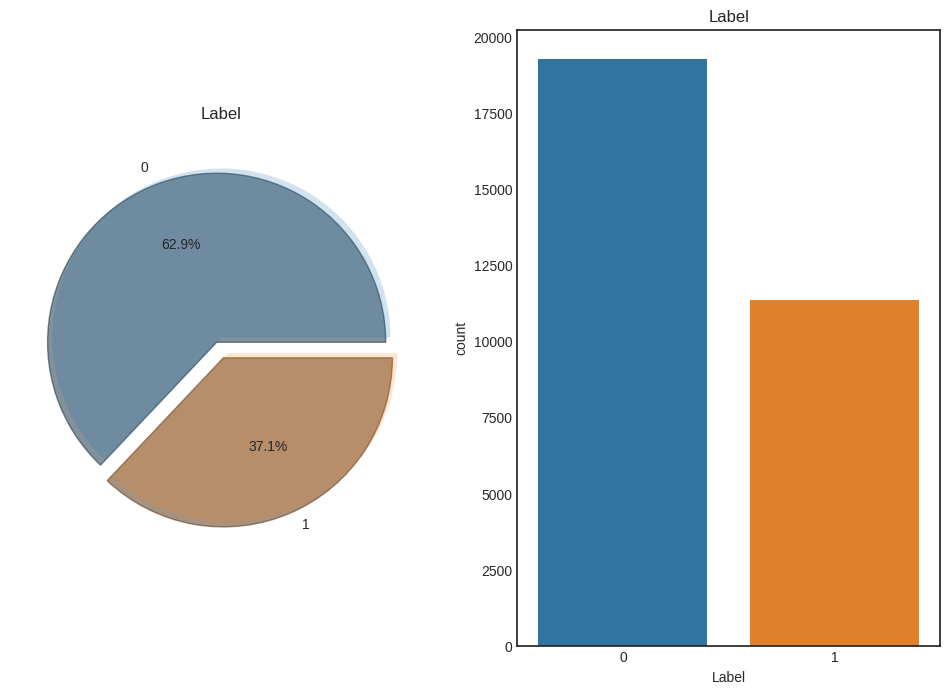

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1
10,? or 1 = 1 --,1


In [19]:


#Узнаем количество безопасных (0) и опасных (1) SQLi
#df[df['Label'] == 0].count()
#df[df['Label'] == 1].count()

###Выводим процентное и количественное соотношение значений Label
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})

ax[0].set_title('Label')
ax[0].set_ylabel('')

#sns.countplot(data=df,ax=ax[1], alpha=0.5)
sns.countplot(data=df, x = 'Label')
ax[1].set_title('Label')
plt.show()

#Теперь с датасетом можно работать
df.head(15)

In [23]:
np.array(df.loc[indexes])

array([['select   (  case when   (  9556  =  7122  )   then 9556 else 9556*  (  select 9556 from information_schema.character_sets  )   end  )  #',
        1],
       ['1"  )   or 6793  =    (  select 6793 from pg_sleep  (  5   )    )    and   (  "lsis" like "lsis',
        1],
       ["-7962'   )    )    as pgqz where 6058  =  6058 or 4493  =  utl_inaddr.get_host_address  (  chr  (  113  )  ||chr  (  113  )  ||chr  (  112  )  ||chr  (  106  )  ||chr  (  113  )  ||  (  select   (  case when   (  4493  =  4493  )   then 1 else 0 end  )   from dual  )  ||chr  (  113  )  ||chr  (  122  )  ||chr  (  118  )  ||chr  (  122  )  ||chr  (  113   )    )   --",
        1]], dtype=object)

Помимо векторизации запросов добавим несколько характеристик, например, есть ли в запросе знак * или # Предполагается, что от этого качество результатов улучшится.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-8-903b3348a946>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  payloads = df.Sentence.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


All frequencies, including STOPWORDS:
        Frequency
Word             
)           50682
(           45635
select      22494
=           17735
,           17640
from        16154
'           15785
1           10166
*            9839
where        8267


<ipython-input-8-903b3348a946>:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn-white')


<Axes: xlabel='Word'>

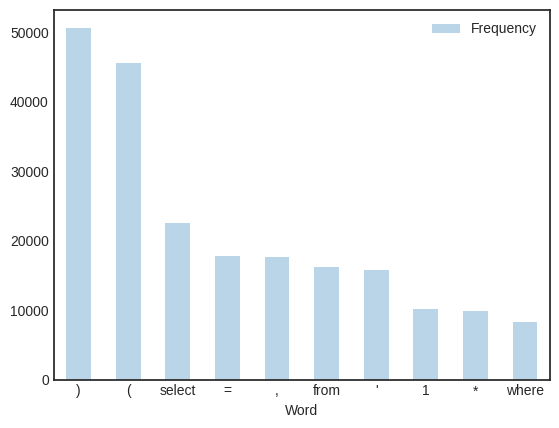

In [8]:
#Отображаем самые частые фразы или символы (частота)
#!pip install nltk

import nltk
nltk.download('punkt')
import matplotlib

top_N = 10

payloads = df.Sentence.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(payloads)
word_dist = nltk.FreqDist(words)

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
print('=' * 60)

matplotlib.style.use('seaborn-white')

rslt.plot.bar(rot=0, alpha=0.3)

In [9]:
#Получить названия колонок
#df.columns

#Символы: # * = $ % & | \ / ? -- , . ' ; : ( ) @ + ! < > [ ] { }

#Подсчитываем количество знаков #
df["grid"] = df["Sentence"].apply(lambda x: x.count("#") if "#" in x else 0 )

#Подсчитываем количество знаков *
df["star"] = df["Sentence"].apply(lambda x: x.count("*") if "*" in x else 0 )

#Подсчитываем количество знаков =
df["equal"] = df["Sentence"].apply(lambda x: x.count("=") if "=" in x else 0 )

#Подсчитываем количество знаков $
df["dollar"] = df["Sentence"].apply(lambda x: x.count("$") if "$" in x else 0 )

#Подсчитываем количество знаков %
df["percent"] = df["Sentence"].apply(lambda x: x.count("%") if "%" in x else 0 )

#Подсчитываем количество знаков &
df["and"] = df["Sentence"].apply(lambda x: x.count("&") if "&" in x else 0 )

#Подсчитываем количество знаков |
df["line"] = df["Sentence"].apply(lambda x: x.count("|") if "|" in x else 0 )

#Подсчитываем количество знаков \
df["slash1"] = df["Sentence"].apply(lambda x: x.count("\\") if "\\" in x else 0 )

#Подсчитываем количество знаков /
df["slash2"] = df["Sentence"].apply(lambda x: x.count("/") if "/" in x else 0 )

#Подсчитываем количество знаков ?
df["question"] = df["Sentence"].apply(lambda x: x.count("?") if "/?" in x else 0 )

#Подсчитываем количество знаков --
df["comment"] = df["Sentence"].apply(lambda x: x.count("--") if "--" in x else 0 )

#Подсчитываем количество знаков,
df["comma"] = df["Sentence"].apply(lambda x: x.count(",") if "," in x else 0 )

#Подсчитываем количество знаков .
df["point"] = df["Sentence"].apply(lambda x: x.count(".") if "." in x else 0 )

#Подсчитываем количество знаков '
df["quat_mark"] = df["Sentence"].apply(lambda x: x.count("\'") if "\'" in x else 0 )

#Подсчитываем количество знаков ;
df["point_comma"] = df["Sentence"].apply(lambda x: x.count(";") if ";" in x else 0 )

#Подсчитываем количество знаков :
df["colon"] = df["Sentence"].apply(lambda x: x.count(":") if ":" in x else 0 )

#Подсчитываем количество знаков (
df["bracket_l"] = df["Sentence"].apply(lambda x: x.count("(") if "(" in x else 0 )

#Подсчитываем количество знаков )
df["bracket_r"] = df["Sentence"].apply(lambda x: x.count(")") if ")" in x else 0 )

#Подсчитываем количество знаков @
df["at"] = df["Sentence"].apply(lambda x: x.count("@") if "@" in x else 0 )

#Подсчитываем количество знаков +
df["plus"] = df["Sentence"].apply(lambda x: x.count("+") if "+" in x else 0 )

#Подсчитываем количество знаков !
df["exclam"] = df["Sentence"].apply(lambda x: x.count("!") if "!" in x else 0 )

#Подсчитываем количество знаков <
df["less"] = df["Sentence"].apply(lambda x: x.count("<") if "<" in x else 0 )

#Подсчитываем количество знаков >
df["more"] = df["Sentence"].apply(lambda x: x.count(">") if ">" in x else 0 )

#Подсчитываем количество знаков [
df["bracket_l_sq"] = df["Sentence"].apply(lambda x: x.count("[") if "[" in x else 0 )

#Подсчитываем количество знаков ]
df["bracket_r_sq"] = df["Sentence"].apply(lambda x: x.count("]") if "]" in x else 0 )

#Подсчитываем количество знаков {
df["bracket_l_fig"] = df["Sentence"].apply(lambda x: x.count("{") if "{" in x else 0 )

#Подсчитываем количество знаков }
df["bracket_r_fig"] = df["Sentence"].apply(lambda x: x.count("}") if "}" in x else 0 )

#Слова: where from select or union password

#Подсчитываем количество слов where
df["word_where"] = df["Sentence"].apply(lambda x: x.lower().count("where") if "where" in x.lower() else 0 )

#Подсчитываем количество слов from
df["word_from"] = df["Sentence"].apply(lambda x: x.lower().count("from") if "from" in x.lower() else 0 )

#Подсчитываем количество слов select
df["word_select"] = df["Sentence"].apply(lambda x: x.lower().count("select") if "select" in x.lower() else 0 )

#Подсчитываем количество слов or
df["word_or"] = df["Sentence"].apply(lambda x: x.lower().count("or") if "or" in x.lower() else 0 )

#Подсчитываем количество слов union
df["word_union"] = df["Sentence"].apply(lambda x: x.lower().count("union") if "union" in x.lower() else 0 )

#Подсчитываем количество слов password
df["word_password"] = df["Sentence"].apply(lambda x: x.lower().count("password") if "password" in x.lower() else 0 )

#########Добавить столбец, если какие-то еще появляются выше
df = df.reindex(columns=['Sentence', 'grid', 'star', 'equal', 'dollar', 'percent',
       'and', 'line', 'slash1', 'slash2', 'question', 'comment', 'comma',
       'point', 'quat_mark', 'point_comma', 'colon', 'bracket_l', 'bracket_r', 
       'at', 'plus', 'exclam', 'less', 'more', 'bracket_l_sq', 'bracket_r_sq',
       'bracket_l_fig', 'bracket_r_fig', 'word_where', 'word_from', 'word_select',
       'word_or', 'word_union', 'word_password', 'Label'])

#Сбрасываем индексы
df = df.reset_index(drop=True)
#убираем данные через одно
#df = df.drop(labels = range(0, 30609, 2),axis = 0)

#Создаем DataFrame, чтобы отсеять незначимые признаки для классификации
add_info = df[['grid', 'star', 'equal', 'dollar', 'percent',
       'and', 'line', 'slash1', 'slash2', 'question', 'comment', 'comma',
       'point', 'quat_mark', 'point_comma', 'colon', 'bracket_l', 'bracket_r', 
       'at', 'plus', 'exclam', 'less', 'more', 'bracket_l_sq', 'bracket_r_sq',
       'bracket_l_fig', 'bracket_r_fig', 'word_where', 'word_from', 'word_select',
       'word_or', 'word_union', 'word_password', 'Label']]



df
#df.info()



,Sentence,grid,star,equal,dollar,percent,and,line,slash1,slash2,...,bracket_r_sq,bracket_l_fig,bracket_r_fig,word_where,word_from,word_select,word_or,word_union,word_password,Label
0,""" or pg_sleep ( __TIME__ ) --",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,AND 1 = utl_inaddr.get_host_address ( ...,0,0,3,0,0,0,0,0,0,...,0,0,0,1,2,2,0,0,0,1
2,select * from users where id = '1' or @ @1 ...,0,1,2,0,0,0,0,0,0,...,0,0,0,1,1,2,1,1,0,1
3,"select * from users where id = 1 or 1#"" ( ...",1,1,1,0,0,0,0,0,0,...,0,0,0,1,1,2,1,1,0,1
4,select name from syscolumns where id = ...,0,0,2,0,0,0,0,0,0,...,0,0,0,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30604,DELETE FROM door WHERE grow = 'small',0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
30605,DELETE FROM tomorrow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
30606,SELECT wide ( s ) FROM west,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
30607,SELECT * FROM ( SELECT slide FROM breath ),0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,0,0


Отделим часть с дом метриками и вычислим, какие из них имеют более важную значимость при классификации.

cross_val:  0.9950993738088757
importance of each feature: 
0.	equal - 0.4422294010439354
1.	comment - 0.12850546499318483
2.	bracket_r - 0.12716183451575985
3.	grid - 0.10217126735503826
4.	word_from - 0.05231356530463355
5.	point - 0.040646517789454016
6.	bracket_l - 0.038815836910761965
7.	quat_mark - 0.034785142079516926
8.	point_comma - 0.005410416194760617
9.	word_where - 0.005374161698583854
10.	word_select - 0.005137933825333165
11.	comma - 0.004340573159547883
12.	line - 0.002499951803462374
13.	percent - 0.0018355492988308812
14.	word_union - 0.001385174318917203
15.	and - 0.0013691204693162275
16.	star - 0.001240891913859224
17.	dollar - 0.001143752476496459
18.	word_or - 0.0008897625501901446
19.	at - 0.0007733481807990099
20.	colon - 0.000579786775566402
21.	exclam - 0.0004884148950792331
22.	plus - 0.0004122005078859384
23.	slash2 - 0.00037651662126373693
24.	more - 0.00011341531782301722
25.	bracket_l_fig - 0.0
26.	slash1 - 0.0
27.	question - 0.0
28.	bracket_r_sq - 0.0
2

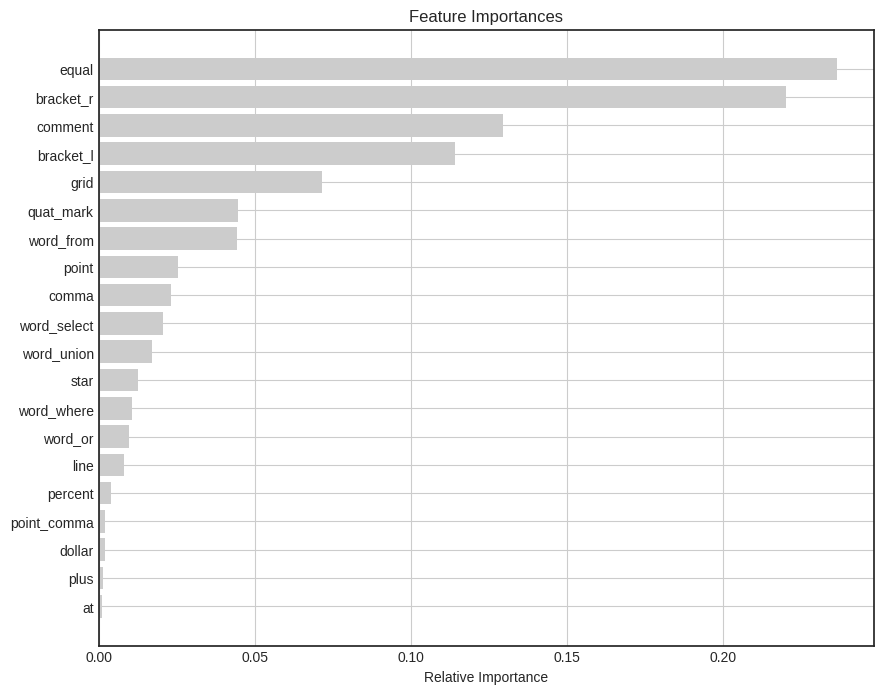

['equal', 'bracket_r', 'comment', 'bracket_l', 'grid', 'quat_mark', 'word_from', 'point', 'comma', 'word_select', 'word_union', 'star', 'word_where', 'word_or', 'line', 'percent', 'point_comma', 'dollar', 'plus', 'at']


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

X = add_info.drop(['Label'], axis = 1)
y = add_info['Label']
# разбиваем на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

#Соотношение классов в выборках
#print(np.bincount(y_train))
#print(np.bincount(y_test))

#анализируем важность признаков
clf = DecisionTreeClassifier(random_state = 0) #дерево решений
clf = clf.fit(X_train, y_train)
results = cross_val_score(clf, X_train, y_train, cv = 5)
print('cross_val: ', results.mean()) #оценка кросс валидации
importances = clf.feature_importances_
print('importance of each feature: ')
indices = np.argsort(importances)[::-1]
for idx, i in enumerate(indices[:30]):
    print("{}.\t{} - {}".format(idx, X_train.columns[i], importances[i])) #Важность признаков

#модель случайного леса

#params = {'n_estimators': [10, 30, 50, 70, 90],
#              'min_samples_leaf': [3, 5, 7, 9],
#              'max_features': [3, 5, 7, 9, 11], 
#              'max_depth': [ 10, 15, 20, 25]}
#scoring = {'f1', 'accuracy'}
#rfc = RandomForestClassifier(random_state = 42)
#gs = GridSearchCV(rfc, params, scoring = scoring, refit='f1', cv = 3, return_train_score=True)
#gs.fit(X_train, y_train)
#print(gs.best_params_) #лучшие параметры для этой модели

#{'max_depth': 25, 'max_features': 11, 'min_samples_leaf': 3, 'n_estimators': 70}
rf = RandomForestClassifier(n_estimators = 70, random_state = 42, oob_score = True, max_depth = 25, max_features = 11, min_samples_leaf = 3)
rf.fit(X_train, y_train)
print("Training accuracy: {:.2f} \n Validation accuracy: {:.2f} \nOut-of-bag accuracy: {:.2f}".format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webatt_f = [] #важные параметры
for index, i in enumerate(indices[:30]):
    webatt_f.append(X.columns[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], X.columns[i]))
    
indices = np.argsort(importances)[-20:]
plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

#print(confusion_matrix(y_test, rf.predict(X_test))) #отображает количество верно классифицированных элементов и элементов, которые распознались как объекты противоположного класса
max_f = 20
webatt_f = webatt_f[:max_f] #оставляем важные параметры
print(webatt_f)    

['equal', 'bracket_r', 'comment', 'grid', 'quat_mark', 'word_from', 'point', 'comma', 'word_select', 'word_union', 'star', 'word_where', 'word_or', 'line', 'percent', 'point_comma', 'dollar', 'plus', 'at']


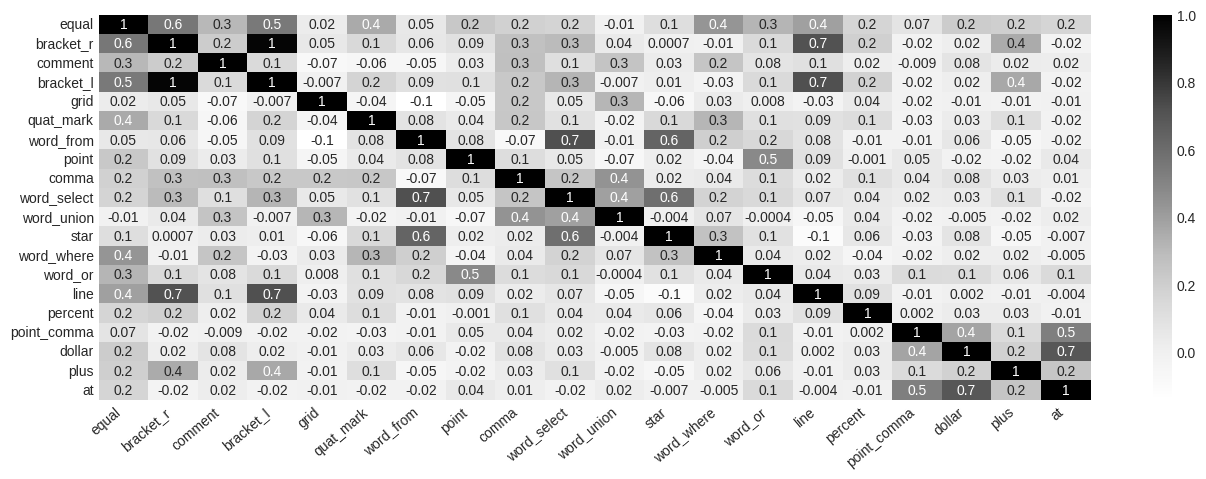

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

#Сокращение признакового пространства
#корреляция Пирсона  
corr_matrix = add_info[webatt_f].corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix, annot = True, fmt ='.1g', cmap = 'Greys')
g.set_xticklabels(g.get_xticklabels(), verticalalignment = 'top', horizontalalignment = 'right', rotation = 40);
plt.savefig('corr_heatmap.png', dpi = 300, bbox_inches = 'tight')

to_be_removed = ['bracket_l']
webatt_f = [i for i in webatt_f if i not in to_be_removed]
print(webatt_f)

Из корреляции пирсона Видим, что правая и левая скобки коррелируют между собой со значением единица. Значит, что один из параметров можно убрать из выборки.
Итоговая выборка признаков с дополнительными значениями - webatt_f
Переходим к вескторизации запросов

In [ ]:
#Векторизация
!pip install transformers
from transformers import BertTokenizer, BertModel
import torch

#Загрузка предобученной модели
model = BertModel.from_pretrained('bert-base-uncased',
                                   output_hidden_states = True)

tokenizer = BertTokenizer.from_pretrained ('bert-base-uncased')

#Оставляем только запросы & label
query_info = df[['Sentence', 'Label']]

sent_vec = []

#Цикл для предложений
for i in range(len(query_info['Sentence'])):
  text = query_info['Sentence'][i]
  marked_text = "[CLS]" + text + "[SEP]"

#Токенизируем предложение
  tokenized_text = tokenizer.tokenize(marked_text)
  #Если токенов больше 512, то разбиваем и считаем среднее по ним
  if (len(tokenized_text) > 512):
    #Храним здесь все значения, которые вышли для отдльных подстрок
    val_steck = []
    #отдельный массив под значения + выделяем окном часть токенов
    #Убираем метки начала и конца
    te = tokenized_text[1:-1]
    for j in range(int(len(te)/510) + 1):
      if (j == int(len(te)/510)):
        quer = te[j*510:]
      else:
        quer = te[j*510:j*510+510]
      quer.insert(0,'[CLS]')
      quer.append('[SEP]') 

      indexed_tokens = tokenizer.convert_tokens_to_ids(quer)
      segments_ids = [1] * len(quer)
      tokens_tensor = torch.tensor([indexed_tokens])
      segments_tensors = torch.tensor([segments_ids])
      with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)
      BERT_hidden_states = outputs[2]
      token_vecs = BERT_hidden_states[-2][0]
      if j !=0:
        p = torch.cat((val_steck[0], token_vecs), dim = 0)
        val_steck.clear()
        val_steck.append(p)
      if j == 0:
        val_steck.append(token_vecs)
    #Среднее значение токенов
    sentence_embedding = torch.mean(val_steck[0], dim = 0)
    #print("Our final sentence embedding vector of shape: ", sentence_embedding.size())
    sent_vec.append(sentence_embedding.numpy())

  else:      
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1] * len(tokenized_text)
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    with torch.no_grad():
      outputs = model(tokens_tensor, segments_tensors)
    BERT_hidden_states = outputs[2]
    token_vecs = BERT_hidden_states[-2][0]
    #Среднее значение токенов
    sentence_embedding = torch.mean(token_vecs, dim = 0)
    #print("Our final sentence embedding vector of shape: ", sentence_embedding.size())
    sent_vec.append(sentence_embedding.numpy())

name_vec = []
#Генерируем имена колонок
for i in range(768):
  text = 'v_' + str(i)
  name_vec.append(text)

#Двумерный массив значений
value_vec = np.array(sent_vec)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.1 MB/s eta 0:00:00


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
###Сохранение данных BERT + Label

df_for_dbscan = pd.DataFrame(data = value_vec, columns = name_vec)
#df_for_dbscan

#Добавляем метки
df_dbscan = pd.concat([df_for_dbscan, query_info['Label']], axis = 1)
#df_dbscan

#Сохраняем данные в файле
df_dbscan.to_csv('DF_res.csv')

In [ ]:
###Сохранение данных, отобранных символов + label

df_classif = pd.concat([df[webatt_f], query_info['Label']], axis = 1)
#df_classif

df_classif.to_csv('DF_res_class.csv')

,equal,bracket_r,comment,grid,quat_mark,word_from,point,comma,word_select,word_union,star,word_where,word_or,line,percent,point_comma,dollar,plus,at,Label
0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,3,5,0,0,3,2,2,1,2,0,0,1,0,0,0,0,0,0,0,1
2,2,1,1,0,3,1,0,1,2,1,1,1,1,0,0,0,0,0,2,1
3,1,1,1,1,0,1,0,1,2,1,1,1,1,0,0,0,0,0,0,1
4,2,1,1,0,1,2,0,0,2,0,0,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30604,1,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
30605,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30606,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
30607,0,1,0,0,0,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0


Теперь один датасет преобразован в 2 разных вида.
1) Выделеные символы будут использоваться для классификации с помощью нескольких моделей
2) Векторизованные запросы (с помощью BERT) будут кластеризованы с помощью HDBSCAN / Метода ближайших соседей

In [ ]:
### Модуль с классификацией ###

# Загрузка составленного датасета из файла

data_class = pd.read_csv('DF_res_class.csv', delimiter=',')
#data_clast

data_class = data_class.drop(columns = ['Unnamed: 0'], axis = 1)
data_class

,equal,bracket_r,comment,grid,quat_mark,word_from,point,comma,word_select,word_union,star,word_where,word_or,line,percent,point_comma,dollar,plus,at,Label
0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,3,5,0,0,3,2,2,1,2,0,0,1,0,0,0,0,0,0,0,1
2,2,1,1,0,3,1,0,1,2,1,1,1,1,0,0,0,0,0,2,1
3,1,1,1,1,0,1,0,1,2,1,1,1,1,0,0,0,0,0,0,1
4,2,1,1,0,1,2,0,0,2,0,0,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30604,1,0,0,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
30605,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
30606,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
30607,0,1,0,0,0,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0


In [1]:
###Модуль с кластеризацией ####
import pandas as pd
# Загрузка составленного датасета из файла

data_clast = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Diplom Work/data/DF_res.csv', delimiter=',')
#data_clast

data_clast = data_clast.drop(columns = ['Unnamed: 0'], axis = 1)
data_clast.rename(columns = {'Label':'Cluster'}, inplace = True)
data_clast 

,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,...,v_759,v_760,v_761,v_762,v_763,v_764,v_765,v_766,v_767,Cluster
0,0.494427,0.061998,0.691902,-0.471939,0.559799,-0.180901,0.341351,0.231110,0.033267,-0.178274,...,-0.090135,-0.423126,0.041139,-0.272625,-0.250488,-0.096983,-0.243879,-0.297217,-0.022840,1
1,-0.419222,-0.153809,0.835694,-0.593651,0.369079,-0.274523,0.204267,0.434409,0.383093,0.130761,...,-0.007678,-0.454896,-0.002399,0.150841,0.230170,-0.051501,-0.664750,-0.159693,0.694422,1
2,0.183771,-0.236388,0.646532,-0.620028,-0.013147,-0.265390,0.044263,0.350538,0.172885,-0.019581,...,-0.213705,-0.199302,-0.223143,0.077056,0.216391,-0.190699,-0.793233,-0.098753,0.658823,1
3,0.027312,-0.305726,0.617269,-0.630630,0.231568,-0.526451,-0.102434,0.183224,0.220388,0.069656,...,-0.033646,-0.431504,-0.054837,0.215584,0.231383,-0.065605,-0.628338,-0.301148,0.875142,1
4,-0.220235,-0.180620,0.607961,-0.397392,0.324019,-0.268316,-0.138487,0.396324,0.216409,-0.024682,...,-0.049187,-0.343633,-0.062400,0.255368,0.284027,-0.172170,-0.807413,-0.105306,0.828324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30604,-0.029293,-0.248417,0.283540,-0.612247,0.434795,0.205745,0.611813,0.504208,-0.231640,-0.038432,...,-0.264770,-0.027695,-0.062228,0.719947,0.258421,-0.257912,-0.537979,-0.260901,0.183249,0
30605,0.210175,-0.703460,0.241675,-0.096402,-0.103304,-0.329889,-0.011471,0.497379,0.261013,-0.398343,...,-0.252915,-0.165918,-0.497170,0.880667,-0.120650,-0.411049,-0.645428,-0.387892,-0.069771,0
30606,-0.379825,-0.527772,0.049862,-0.068713,0.372309,0.099324,-0.363554,-0.139586,0.005208,-0.258269,...,-0.023981,0.324553,0.271811,0.123789,0.068317,-0.300963,-0.066151,-0.618220,0.541520,0
30607,0.121569,-0.505593,0.622385,-0.735325,0.030311,0.364395,0.401868,-0.374090,0.173841,-0.702152,...,-0.233276,-0.417092,0.385117,-0.034582,0.375437,-0.554751,-0.547430,-0.585807,0.203560,0


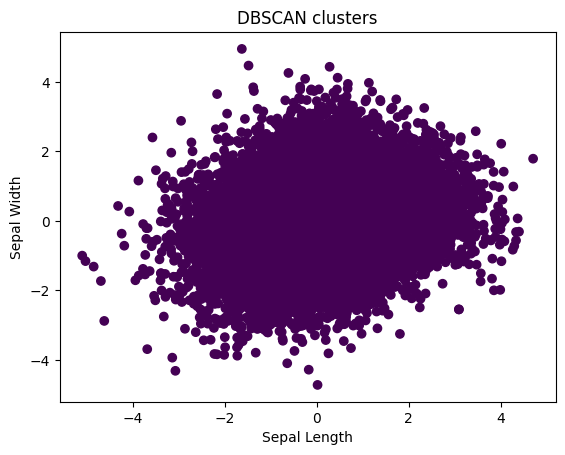

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

X = data_clast.drop(['Cluster'], axis = 1)
y = data_clast['Cluster']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps= 0.5, min_samples=100, algorithm='ball_tree', metric='minkowski', leaf_size=90, p=2)
dbscan.fit(X)

labels = dbscan.labels_

import matplotlib.pyplot as plt
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN clusters') 
plt.show()

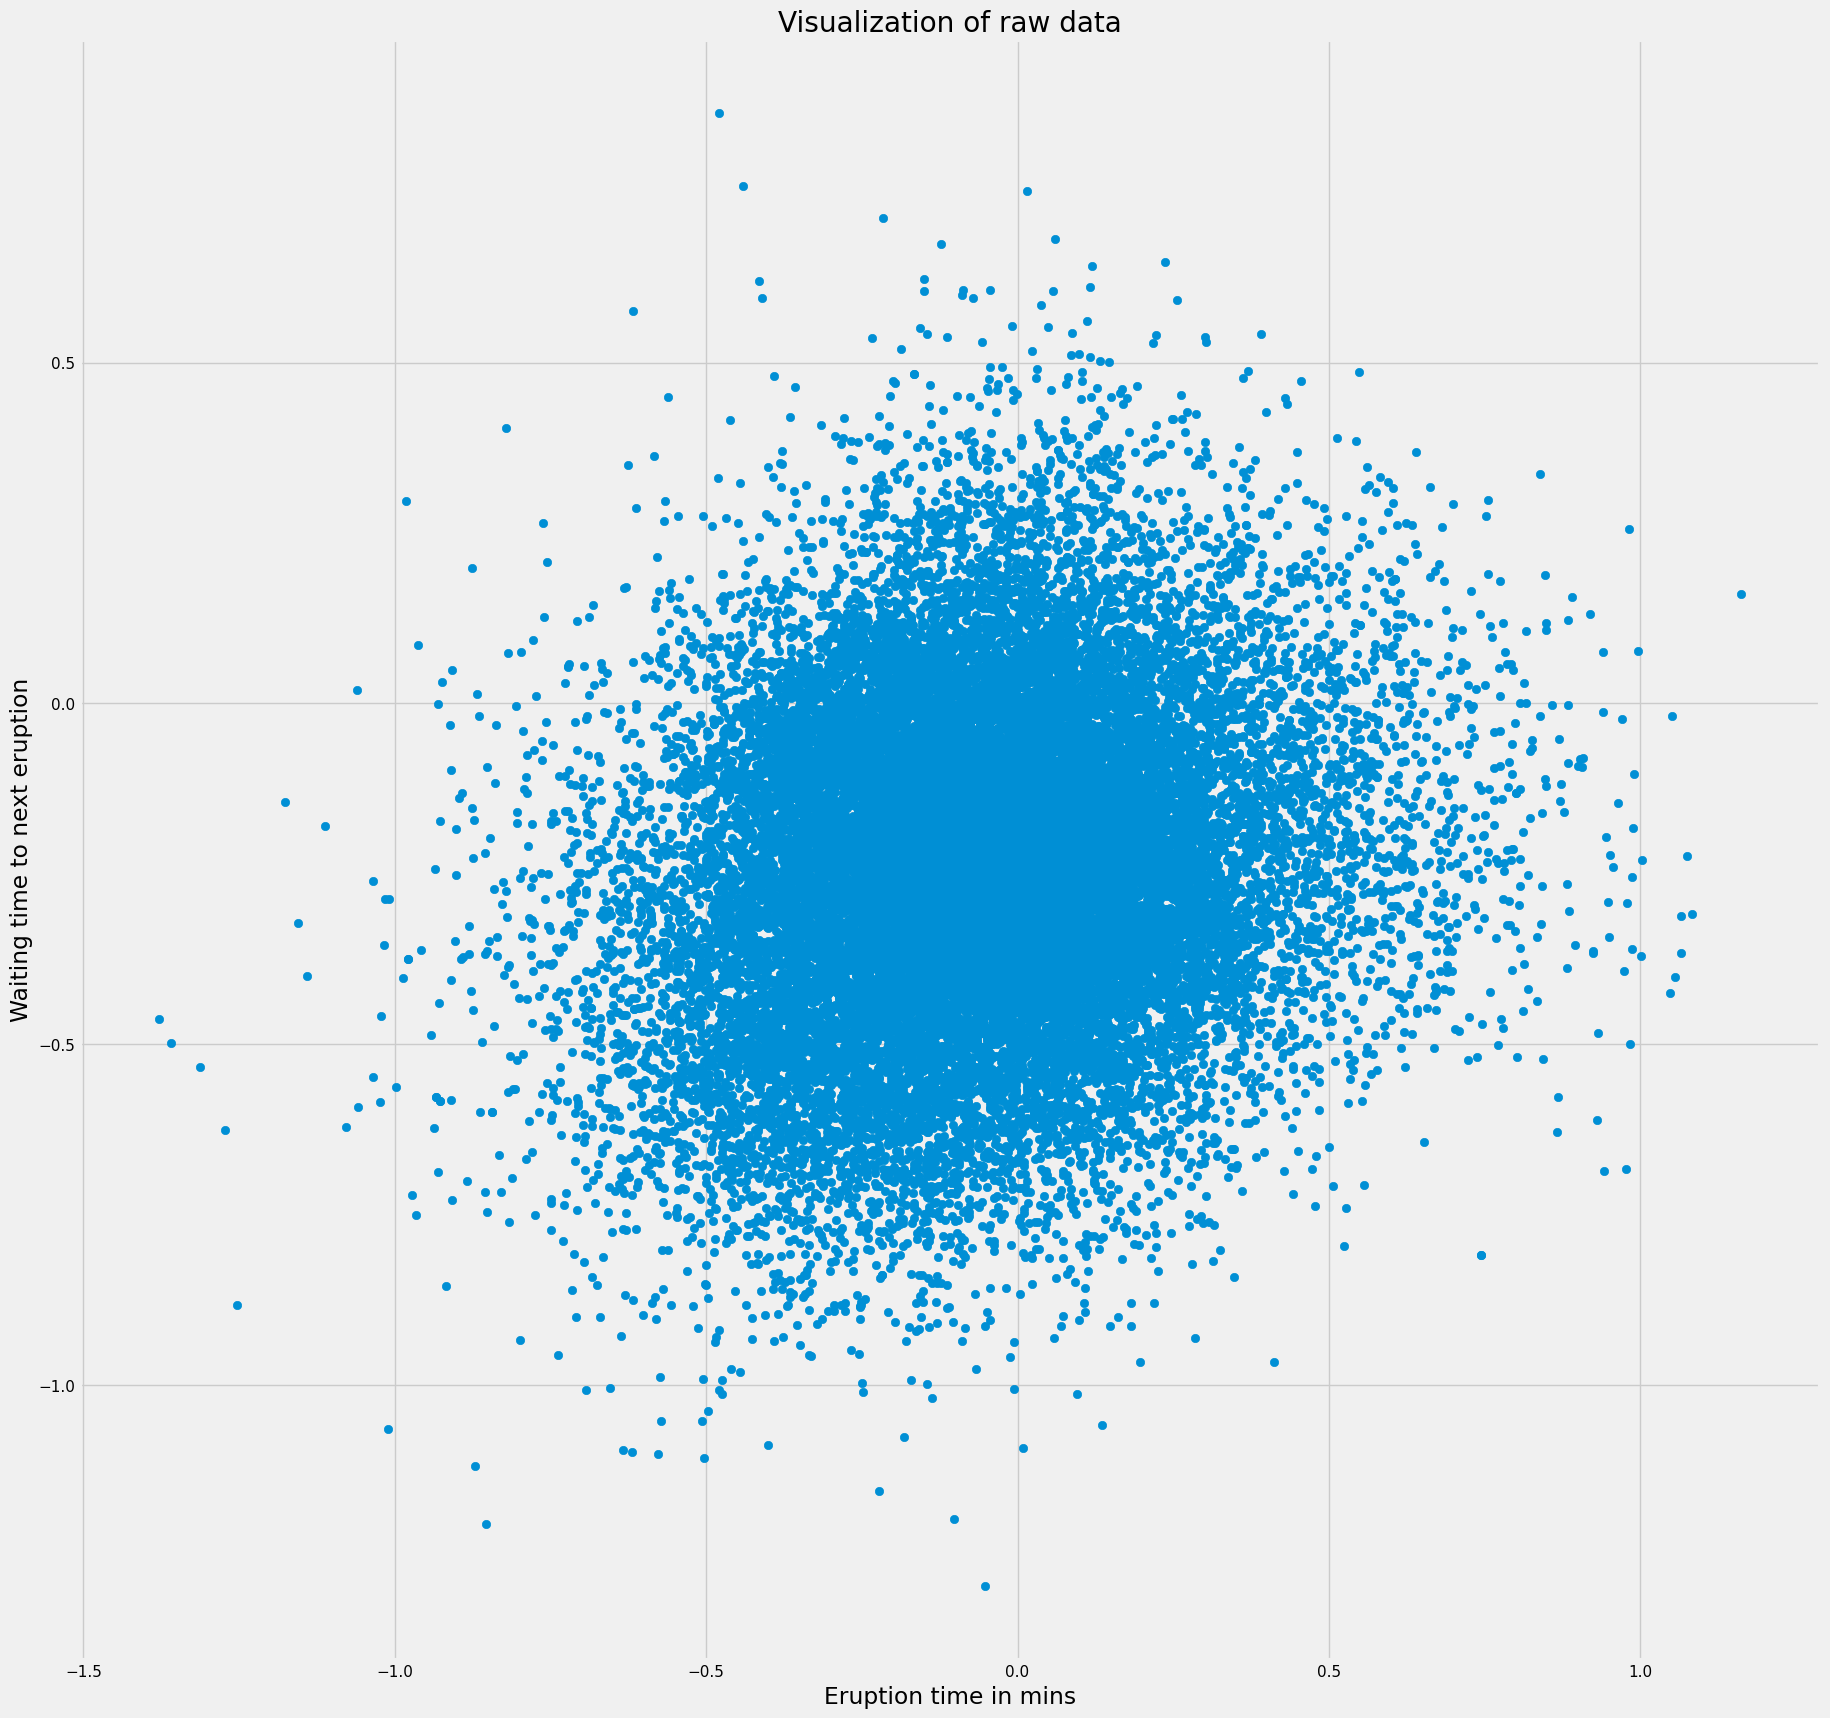

In [9]:
#K-Means
# Визуализация данных
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import seaborn as sns
from sklearn.datasets import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Plot the data
plt.figure(figsize=(20, 20))
plt.scatter(data_clast.iloc[:, 0], data_clast.iloc[:, 1])
plt.xlabel('Eruption time in mins')
plt.ylabel('Waiting time to next eruption')
plt.title('Visualization of raw data');

In [26]:
#Определяем лучшие параметры для модели, она запускается в другом блокноте

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
#k-means w/o outliers
kmeans = KMeans(n_clusters = 2, random_state = 5) 
#data_tr = X.transpose() 
# kmeans.fit(X)
# X.cluster = kmeans.labels_
# kmeans.labels_
# y_pred= kmeans.labels_
#metric for k-means w/o outliers metric(y_true, y_pred)


params = {'init' : ['k-means++', 'random'],
         'algorithm' : ['lloyd', 'elkan', 'auto', 'full'],
         'max_iter' : [300, 350, 400, 250]}
scoring = {'f1', 'accuracy'}


gs = GridSearchCV(kmeans, params, scoring = scoring, refit='f1', cv = 3, return_train_score=True)
gs.fit(X, y)
print(gs.best_params_) #лучшие параметры для этой модели получились: {'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300}

{'algorithm': 'lloyd', 'init': 'k-means++', 'max_iter': 300}
